# Capstone Project
## Machine Learning Engineer Nanodegree

<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Cancer Detection with Keras</H1></u></center>

## Import modules

In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)

set_session(sess) 

Using TensorFlow backend.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.datasets import mnist
%matplotlib inline

## Importing the data:

In [3]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    cancer_files = np.array(data['filenames'])
    cancer_targets = np_utils.to_categorical(np.array(data['target']), 3)
    return cancer_files, cancer_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dermatologist-ai/data/train/train')
valid_files, valid_targets = load_dataset('dermatologist-ai/data/valid/valid')
test_files, test_targets = load_dataset('dermatologist-ai/data/test/test')

# load list of dog names
cancer_names = [item[20:-1] for item in sorted(glob("dermatologist-ai/data/train/train/*/"))]

# print statistics about the dataset
print('There are %d total skin cancer categories.' % len(cancer_names))
print('There are %s total skin images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training skin cancer images.' % len(train_files))
print('There are %d validation skin cancer images.' % len(valid_files))
print('There are %d test skin cancer images.'% len(test_files))

There are 3 total skin cancer categories.
There are 14307 total skin images.

There are 13557 training skin cancer images.
There are 150 validation skin cancer images.
There are 600 test skin cancer images.


In [4]:
train_targets.shape


(13557, 3)

In [4]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

In [5]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [6]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))


In [7]:
#Normalize the input data:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 600/600 [03:39<00:00,  2.53it/s]


In [12]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
#model.add(Dropout(0.2, input_shape=(224,224,3)))
model.add(Conv2D(16, (2, 2), padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Conv2D(32, (2, 2),padding='valid',activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Conv2D(64, (2, 2), padding='valid',activation='relu'))
#model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
#model.add(GlobalAveragePooling2D(data_format=None))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 16)      208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 223, 223, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 32)      2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 54, 54, 64)        8256      
__________

In [ ]:
# Add ops to save and restore all the variables.
saver = tf.train.Saver()
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "saved_models/tensorvalues.ckpt")
  print("Model restored.")

In [13]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 223, 223, 16)      208       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 222, 222, 32)      2080      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 221, 221, 64)      8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 221, 221, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 774400)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               99123328  
__________

## CNN architecture:

## Compiling the model:

In [2]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Activation
from keras.layers import Input
from keras import backend as K
from keras.layers.normalization import BatchNormalization

# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))  # this assumes K.image_data_format() == 'channels_last'


# create the base pre-trained model
#base_model = InceptionV3(input_tensor=input_tensor,weights='imagenet', include_top=False)
base_model = ResNet50(input_tensor=input_tensor,weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 3 classes
predictions = Dense(3, activation='softmax')(x)
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False



Using TensorFlow backend.


In [3]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_1[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

In [12]:
from keras.optimizers import SGD
# Compile model
model.compile(optimizer=SGD(lr=0.0001, momentum=0.99), loss='categorical_crossentropy')

In [13]:
#Image augmentation
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(train_tensors)
datagen_valid.fit(valid_tensors)

## Train the model:

In [24]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 10
batch_size=512

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.resnet50.hdf5_new_3', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, validation_data=(valid_tensors, valid_targets),epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)
#model.fit_generator(datagen_train.flow(train_tensors, train_targets, batch_size=batch_size),
#                    steps_per_epoch=train_tensors.shape[0], 
#                    epochs=epochs, verbose=1, callbacks=[checkpointer],
#                    validation_data=datagen_valid.flow(valid_tensors, valid_targets, batch_size=batch_size),
#                    validation_steps=valid_tensors.shape[0])

Train on 13557 samples, validate on 150 samples
Epoch 1/10
13557/13557 [==============================] - 114s - loss: 0.1080 - val_loss: 0.7713
Epoch 2/10
13557/13557 [==============================] - 113s - loss: 0.1070 - val_loss: 0.7794
Epoch 3/10
13557/13557 [==============================] - 114s - loss: 0.1056 - val_loss: 0.7712
Epoch 4/10
13557/13557 [==============================] - 113s - loss: 0.1062 - val_loss: 0.7727
Epoch 5/10
13557/13557 [==============================] - 113s - loss: 0.1027 - val_loss: 0.7766
Epoch 6/10
13557/13557 [==============================] - 113s - loss: 0.1039 - val_loss: 0.7774
Epoch 7/10
13557/13557 [==============================] - 113s - loss: 0.1030 - val_loss: 0.7736
Epoch 8/10
13557/13557 [==============================] - 113s - loss: 0.1013 - val_loss: 0.7802
Epoch 9/10
13557/13557 [==============================] - 113s - loss: 0.1019 - val_loss: 0.7878
Epoch 10/10
13557/13557 [==============================] - 113s - loss: 0.0999 

In [1]:
#saved_models/weights.best.resnet50.hdf5
#model.load_weights('saved_models/weights.best.inception_tf.hdf5')
model.load_weights('saved_models/weights.best.resnet50.hdf5_new_3')

NameError: name 'model' is not defined

In [23]:
# get index of predicted cancer type for each image in test set
cancer_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(cancer_predictions)==np.argmax(test_targets, axis=1))/len(cancer_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 71.3333%


# Create output .csv for testing

In [17]:
import pandas as pd
y_pred = pd.DataFrame(columns=["task_1", "task_2"])

for ii in range(len(test_targets)):
    probability = model.predict(np.expand_dims(test_tensors[ii], axis=0))
    ground_truth = test_targets[ii]
    prediction = np.argmax(probability)
    print(probability, ground_truth, prediction)

[[  8.59327774e-05   9.99882579e-01   3.14081044e-05]] [ 0.  1.  0.] 1
[[ 0.84059966  0.11630699  0.04309333]] [ 0.  1.  0.] 0
[[ 0.03799566  0.9573856   0.00461864]] [ 0.  1.  0.] 1
[[  2.26508491e-02   9.77159441e-01   1.89726488e-04]] [ 0.  1.  0.] 1
[[ 0.00838031  0.98908162  0.00253805]] [ 0.  1.  0.] 1
[[  3.32971336e-04   9.98083830e-01   1.58319320e-03]] [ 0.  0.  1.] 1
[[ 0.04215313  0.50750589  0.45034093]] [ 0.  1.  0.] 1
[[ 0.05376368  0.00441444  0.94182187]] [ 0.  0.  1.] 2
[[ 0.75301737  0.23970637  0.0072763 ]] [ 0.  1.  0.] 0
[[ 0.05995583  0.71598876  0.22405535]] [ 0.  1.  0.] 1
[[ 0.00275743  0.98654526  0.01069736]] [ 0.  1.  0.] 1
[[  1.74288856e-04   9.99816954e-01   8.80792868e-06]] [ 0.  1.  0.] 1
[[ 0.10764873  0.88998735  0.00236385]] [ 0.  1.  0.] 1
[[  2.76485545e-04   3.60111773e-01   6.39611781e-01]] [ 0.  1.  0.] 2
[[ 0.13825947  0.8553558   0.00638475]] [ 1.  0.  0.] 1
[[ 0.00403593  0.9890781   0.00688585]] [ 0.  1.  0.] 1
[[ 0.01881734  0.97187084  0.

[[  4.79482561e-02   9.51893151e-01   1.58637107e-04]] [ 0.  1.  0.] 1
[[ 0.00235606  0.8554213   0.14222269]] [ 0.  1.  0.] 1
[[ 0.00665202  0.61270821  0.3806397 ]] [ 0.  1.  0.] 1
[[ 0.08565588  0.80149704  0.11284718]] [ 0.  0.  1.] 1
[[ 0.37064943  0.59496307  0.03438748]] [ 0.  1.  0.] 1
[[ 0.00202822  0.8748318   0.12314006]] [ 0.  1.  0.] 1
[[ 0.00480728  0.99358153  0.00161124]] [ 1.  0.  0.] 1
[[ 0.09412164  0.18318184  0.72269654]] [ 0.  1.  0.] 2
[[ 0.96949768  0.00822454  0.02227771]] [ 0.  0.  1.] 0
[[  1.69902918e-07   1.54594469e-04   9.99845266e-01]] [ 0.  0.  1.] 2
[[ 0.15963729  0.09701283  0.74334985]] [ 1.  0.  0.] 2
[[ 0.00250759  0.98722082  0.01027158]] [ 0.  1.  0.] 1
[[  2.24444229e-04   9.87146616e-01   1.26290303e-02]] [ 0.  1.  0.] 1
[[  2.90478379e-01   7.09444165e-01   7.74760920e-05]] [ 0.  1.  0.] 1
[[ 0.21452914  0.66760182  0.11786903]] [ 1.  0.  0.] 1
[[ 0.02390044  0.95166391  0.02443564]] [ 0.  1.  0.] 1
[[ 0.00608421  0.87926054  0.11465521]] [ 0.

[[ 0.00323828  0.0784641   0.91829759]] [ 0.  0.  1.] 2
[[ 0.09240052  0.80433351  0.10326595]] [ 0.  1.  0.] 1
[[ 0.00306314  0.97615427  0.02078265]] [ 0.  1.  0.] 1
[[  9.40704167e-01   5.91696948e-02   1.26188301e-04]] [ 1.  0.  0.] 0
[[ 0.08396017  0.90723592  0.00880393]] [ 0.  1.  0.] 1
[[ 0.18886252  0.80932796  0.00180957]] [ 0.  1.  0.] 1
[[ 0.36287719  0.63278127  0.00434149]] [ 0.  1.  0.] 1
[[ 0.95078957  0.04601562  0.00319477]] [ 1.  0.  0.] 0
[[ 0.02346401  0.96850944  0.0080266 ]] [ 1.  0.  0.] 1
[[ 0.00639732  0.83824241  0.15536031]] [ 0.  1.  0.] 1
[[ 0.00123931  0.99705887  0.00170178]] [ 0.  1.  0.] 1
[[ 0.0146377   0.95150048  0.03386175]] [ 0.  1.  0.] 1
[[ 0.32794765  0.37983403  0.2922183 ]] [ 0.  1.  0.] 1
[[  4.91953362e-03   9.95070100e-01   1.04480278e-05]] [ 1.  0.  0.] 1
[[ 0.11147033  0.88027686  0.0082528 ]] [ 0.  1.  0.] 1
[[ 0.48936021  0.00162008  0.50901973]] [ 0.  1.  0.] 2
[[  2.52771206e-05   9.99096751e-01   8.78031540e-04]] [ 0.  1.  0.] 1
[[ 

[[ 0.22119598  0.72374183  0.05506218]] [ 0.  0.  1.] 1
[[  8.91092539e-01   1.08782075e-01   1.25338629e-04]] [ 0.  1.  0.] 0
[[ 0.00384018  0.87825376  0.11790609]] [ 0.  0.  1.] 1
[[ 0.16755289  0.80312747  0.02931955]] [ 0.  1.  0.] 1
[[  2.48119272e-02   9.75119531e-01   6.86262210e-05]] [ 0.  1.  0.] 1
[[ 0.01613726  0.01076654  0.97309619]] [ 0.  0.  1.] 2
[[ 0.42436886  0.57432359  0.00130757]] [ 0.  1.  0.] 1
[[  6.15930676e-01   3.83816928e-01   2.52330035e-04]] [ 0.  1.  0.] 0
[[ 0.02451931  0.95417798  0.02130276]] [ 0.  1.  0.] 1
[[  9.91807759e-01   8.11224431e-03   7.99643167e-05]] [ 1.  0.  0.] 0
[[ 0.52010983  0.47597045  0.00391972]] [ 1.  0.  0.] 0
[[  4.49802391e-02   9.54907119e-01   1.12540867e-04]] [ 0.  1.  0.] 1
[[  1.38932106e-03   9.98604596e-01   6.06202866e-06]] [ 0.  1.  0.] 1
[[  5.24207167e-02   9.46990788e-01   5.88515133e-04]] [ 0.  1.  0.] 1
[[ 0.0449796   0.84194487  0.11307556]] [ 0.  1.  0.] 1
[[  1.12202624e-03   9.98155534e-01   7.22407247e-04]] 

[[ 0.36942524  0.2434724   0.38710237]] [ 1.  0.  0.] 2
[[ 0.00198614  0.99361175  0.00440212]] [ 0.  1.  0.] 1
[[ 0.03318641  0.84990162  0.11691194]] [ 0.  1.  0.] 1
[[ 0.00585418  0.73257774  0.26156807]] [ 0.  1.  0.] 1
[[ 0.00068797  0.65449834  0.34481367]] [ 1.  0.  0.] 1
[[  4.18047217e-04   9.92296159e-01   7.28582311e-03]] [ 0.  1.  0.] 1
[[  3.95028590e-04   9.85170066e-01   1.44348843e-02]] [ 0.  1.  0.] 1
[[ 0.21991041  0.77823251  0.00185698]] [ 0.  0.  1.] 1
[[ 0.02797969  0.963835    0.00818531]] [ 0.  1.  0.] 1
[[ 0.63100278  0.00352629  0.36547089]] [ 1.  0.  0.] 0
[[  1.20011078e-04   9.99602377e-01   2.77596060e-04]] [ 0.  1.  0.] 1
[[ 0.8750183   0.10553446  0.01944723]] [ 0.  1.  0.] 0
[[ 0.35920715  0.40105614  0.23973677]] [ 0.  1.  0.] 1
[[  3.60816047e-02   9.63892698e-01   2.55903487e-05]] [ 0.  1.  0.] 1
[[ 0.00228121  0.06386083  0.93385798]] [ 0.  0.  1.] 2
[[ 0.04282435  0.01072935  0.9464463 ]] [ 1.  0.  0.] 2
[[ 0.0315373   0.88155532  0.08690739]] [ 0.

In [18]:
import pandas as pd

y_pred = pd.DataFrame(columns=["task_1", "task_2"])

for ii in tqdm(range(len(test_tensors))):
    #path = test_files[ii]
    prediction = np.argmax(model.predict(np.expand_dims(test_tensors[ii], axis=0)))    
    y_pred.loc[ii] = [0, 0]
   # print(prediction)
    #print(prediction == 0)
    if prediction == 0:
        y_pred.loc[ii]['task_1'] = 1
        #print("melanoma detected at row ",ii)
    if prediction == 2:
        y_pred.loc[ii]['task_2'] = 1
        
y_pred.to_csv('predictions.csv')

100%|██████████| 600/600 [00:21<00:00, 27.38it/s]


# Internal testing vs. ground truths

In [20]:
import itertools
import keras
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_curve, auc, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

def plot_roc_auc(y_true, y_pred):
    """
    This function plots the ROC curves and provides the scores.
    """

    # initialize dictionaries and array
    fpr = dict()
    tpr = dict()
    roc_auc = np.zeros(3)
    
    # prepare for figure
    plt.figure()
    colors = ['aqua', 'cornflowerblue']

    # for both classification tasks (categories 1 and 2)
    for i in range(2):
        # obtain ROC curve
        fpr[i], tpr[i], _ = roc_curve(y_true[:,i], y_pred[:,i])
        # obtain ROC AUC
        roc_auc[i] = auc(fpr[i], tpr[i])
        # plot ROC curve
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
                 label='ROC curve for task {d} (area = {f:.2f})'.format(d=i+1, f=roc_auc[i]))
    # get score for category 3
    roc_auc[2] = np.average(roc_auc[:2])
    
    # format figure
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves')
    plt.legend(loc="lower right")
    plt.show()
    
    # print scores
    for i in range(3):
        print('Category {d} Score: {f:.3f}'. format(d=i+1, f=roc_auc[i]))

def plot_confusion_matrix(y_true, y_pred, thresh, classes):
    """
    This function plots the (normalized) confusion matrix.
    """

    # obtain class predictions from probabilities
    y_pred = (y_pred>=thresh)*1
    # obtain (unnormalized) confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # normalize confusion matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


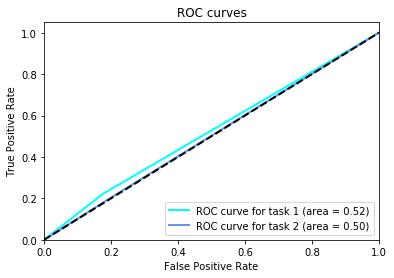

Category 1 Score: 0.523
Category 2 Score: 0.502
Category 3 Score: 0.513


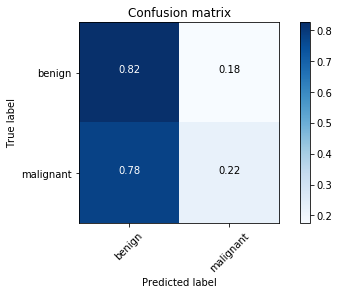

In [22]:
preds_path = sys.argv[1]
thresh = 0.5

# get ground truth labels for test dataset
truth = pd.read_csv('dermatologist-ai/ground_truth.csv')
y_true = truth.as_matrix(columns=["task_1", "task_2"])

# get model predictions for test dataset
y_pred = pd.read_csv("predictions.csv")
y_pred = y_pred.as_matrix(columns=["task_1", "task_2"])

# plot ROC curves and print scores
plot_roc_auc(y_true, y_pred)
# plot confusion matrix
classes = ['benign', 'malignant']
plot_confusion_matrix(y_true[:,0], y_pred[:,0], thresh, classes)

## Reference:

https://keras.io/datasets/